In [16]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [18]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [19]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [20]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
columns_to_normalize = df_market_data.columns
df_market_data[columns_to_normalize] = scaler.fit_transform(df_market_data[columns_to_normalize])

In [30]:
# Create a DataFrame with the scaled data
df_scaled = df_market_data.copy()

# Copy the crypto names from the original data
crypto_names = df_market_data.index.to_frame().reset_index(drop=True)

# Set the coinid column as index
crypto_names.set_index('coin_id', inplace=True)

# Display sample data
crypto_names.head()

""
coin_id
bitcoin
ethereum
tether
ripple
bitcoin-cash


---

### Find the Best Value for k Using the Original Data.

In [22]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [39]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data)
    inertia.append(model.inertia_)


C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

In [41]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k, 'Inertia': inertia}
    
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,K,Inertia
0,10,28.222899
1,10,28.222899
2,10,28.222899
3,10,28.222899
4,10,28.222899


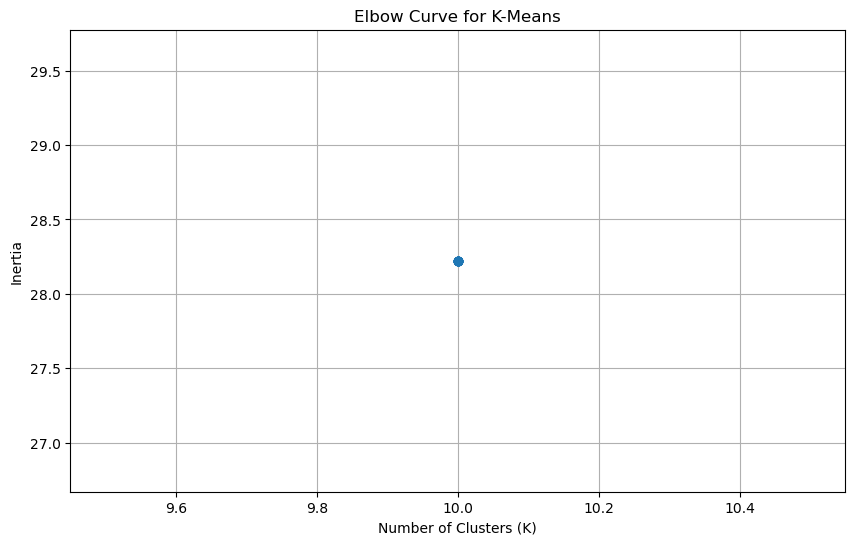

In [44]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.plot(df_elbow['K'], df_elbow['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 10

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [46]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=10, random_state=0)

In [47]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [48]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[5 5 8 8 3 5 5 5 5 1 0 8 8 3 1 1 8 1 5 8 0 5 8 8 8 8 1 0 5 6 1 1 2 1 9 7 4
 0 1 8 0]


In [50]:
# Create a copy of the DataFrame
df_scaled_copy = df_scaled.copy()

In [51]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy['Cluster'] = cluster_labels

# Display sample data
print(df_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [64]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    cmap="Category20",
    hover_cols=["coin_id"],
    width=800,
    height=600
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [53]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [55]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
principal_components = pca.fit_transform(df_scaled_copy)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# View the first five rows of the DataFrame. 
print(principal_df.head())

        PC1       PC2       PC3
0  0.736487 -0.606434  0.800753
1  0.673184 -0.461473  0.435506
2  3.735793 -0.439770 -0.457794
3  3.724556 -0.478141 -0.508542
4 -1.276431 -1.165349  2.183712


In [56]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: Explained Variance = {variance:.4f}")

Principal Component 1: Explained Variance = 0.5810
Principal Component 2: Explained Variance = 0.1585
Principal Component 3: Explained Variance = 0.1456


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The plot representing the variance explained by the components is called Scree Plot. The first 2 components explain approximately 80% of the total variation and 3 components, almost 90%

In [57]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Creating a DataFrame with the PCA data
pca_data_df = principal_df.copy()

# Copy the crypto names from the original data
crypto_names = df_market_data.index.to_frame()

# Set the coinid column as index
pca_df.index = crypto_names['coin_id']

# Display sample data
print(pca_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin       0.736487 -0.606434  0.800753
ethereum      0.673184 -0.461473  0.435506
tether        3.735793 -0.439770 -0.457794
ripple        3.724556 -0.478141 -0.508542
bitcoin-cash -1.276431 -1.165349  2.183712


---

### Find the Best Value for k Using the PCA Data

In [61]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

In [77]:
# Create inertia_values = []an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(pca_df)
    inertia.append(model.inertia_)



C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

In [78]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k, 'Inertia': inertia}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

     K    Inertia
0    1  28.222899
1    2  28.222899
2    3  28.222899
3    4  28.222899
4    5  28.222899
5    6  28.222899
6    7  28.222899
7    8  28.222899
8    9  28.222899
9   10  28.222899
10  11  28.222899


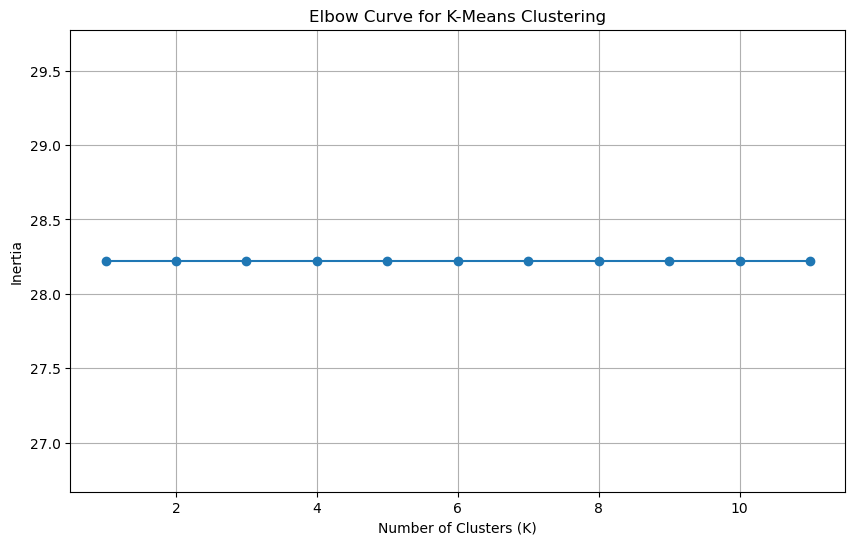

In [79]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['K'], elbow_df['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 10


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [81]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=6, random_state=0)

In [83]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adria\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [84]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = model.predict(pca_df)
# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 3 3 5 0 0 0 0 1 1 3 3 5 1 1 3 1 0 3 1 0 3 3 3 3 1 1 0 0 1 1 2 1 3 3 4
 1 1 3 1]


In [85]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = cluster_labels

# Display sample data
print(pca_df_copy.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin       0.736487 -0.606434  0.800753        0
ethereum      0.673184 -0.461473  0.435506        0
tether        3.735793 -0.439770 -0.457794        3
ripple        3.724556 -0.478141 -0.508542        3
bitcoin-cash -1.276431 -1.165349  2.183712        5


In [86]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_df_copy.hvplot.scatter(x="PC1", y="PC2", c="Cluster", cmap="Set1", hover_cols=["coin_id"])
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [87]:
# Composite plot to contrast the Elbow curves
import holoviews as hv
elbow_curve = elbow_df.hvplot.line(x="K", y="Inertia", title="Elbow Curve for K-Means Clustering")
composite_plot = scatter_plot + elbow_curve
composite_plot

:Layout
   .Scatter.I :Scatter   [PC1]   (PC2,Cluster,coin_id)
   .Curve.I   :Curve   [K]   (Inertia)

In [92]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
scatter_plot = pca_df_copy.hvplot.scatter(x="PC1", y="PC2", c="Cluster", cmap="Set1", hover_cols=["coin_id"])
composite_plot = scatter_plot
composite_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 